## Постановка задачи:

От нас требуется ознакомится с датасетом, проанализировать и визуализировать его данные, решить задачу классификации.

В качестве задачи классификации было решено определить к какому классу ("Определенно съедобный", "Ядовитый/нерекомендованный к употреблению") относятся грибы, информация о которых собрана в датасете.



Установливаем библиотеку Pandas:

In [ ]:
! pip install pandas

Импортируем необходимые модули:

In [47]:
import numpy as np
import seaborn as sns  
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Знакомство с dataset-ом

In [48]:
data = pd.read_csv('./mushrooms.csv', sep = ',', header=0, engine = 'python')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


## О наборе данных

Этот набор данных включает описания гипотетических образцов, соответствующих 23 видам жаберных грибов семейства Agaricus(шампиньоны) и Lepiota(чешуйницы), взятых из Полевого руководства Общества Одюбона по североамериканским грибам (1981). Каждый вид идентифицирован как определенно съедобный, определенно ядовитый или неизвестной съедобности и не рекомендуется. Этот последний класс был объединен с ядовитым. В руководстве четко указано, что не существует простого правила для определения съедобности гриба.

Данный датасет содержит 23 категориальных признака:

- `class`: съедобный = e, ядовитый = p

- `cap-shape`(форма шляпки): колокольчик = b, коническая = c, выпуклая = x, плоская = f, бугристая = k, утопленная = s

- `cap-surface`(поверхность шляпки): волокнистая = f, бороздки = g, чешуйчатая = y, гладкая = s

- `cap-color`(цвет шапки): коричневый = n, бурый = b, коричный = c, серый = g, зеленый = r, розовый = p, фиолетовый = u, красный = e, белый = w, желтый = y

- `bruises`(синяки): синяки = t, нет = f

- `odor`(запах): миндаль = a, анис = l, креозот = c, рыбный = y, неприятный = f, затхлый = m, отсутствует = n, острый = p, пряный = s

- `gill-attachment`(прикрепление жабр): прикреплено = a, опускается = d, свободно = f, зазубрено = n

- `gill-spacing`(расстояние между жабрами): близко = c, тесно = w, далеко = d

- `gill-size`(размер жабр): широкий = b, узкий = n

- `gill-color`(цвет жабр): черный = k, коричневый = n, бурый = b, шоколадный = h, серый = g, зеленый = r, оранжевый = o, розовый = p, фиолетовый = u, красный = e, белый = w, желтый = y

- `stalk-shape`(форма стебля): увеличивающийся = e, сужающийся = t

- `stalk-root`(стебель-корень): луковичный = b, клубень = c, чашечка = u, равный = e, ризоморфы = z, укорененный = r, отсутствует = ? 

- `stalk-surface-above-ring`(поверхность стебля над кольцом): волокнистая = f, чешуйчатая = y, шелковистая = k, гладкая = s

- `stalk-surface-below-ring`(поверхность стебля под кольцом): волокнистая = f, чешуйчатая = y, шелковистая = k, гладкая = s

- `stalk-color-above-ring`(цвет стебля над кольцом): коричневый = n, бурый = b, коричный = c, серый = g, оранжевый = o, розовый = p, красный = e, белый = w, желтый = y

- `stalk-color-below-ring`(цвет стебля под кольцом): коричневый = n, бурый = b, коричный = c, серый = g, оранжевый = o, розовый = p, красный = e, белый = w, желтый = y

- `veil-type`(тип вуали): частичная = p, универсальная = u

- `veil-color`(вуаль-цвет): коричневый = n, оранжевый = o, белый = w, желтый = y

- `ring-number`(число колец): нет = n, один = o, два = t

- `ring-type`(тип кольца): паутинное = c, мимолетное = e, расширяющееся = f, большое = l, отсутствует = n, подвеска = p, оболочка = s, зона = z

- `spore-print-color`(цвет спорового отпечатка): черный = k, коричневый = n, бурый = b, шоколадный = h, зеленый = r, оранжевый = o, фиолетовый = u, белый = w, желтый = y

- `population`(популяция): многочисленная = a, сгруппированная = c, многочисленная = n, рассеянная = s, несколько = v, одиночная = y

- `habitat`(среда обитания): травы = g, листья = l, луга = m, тропинки = p, городские = u, отходы = w, леса = d

Выведем описательную статистику по нашему dataset-у:


In [49]:
data.describe(include = 'all')

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


Визуализируем данные:

<AxesSubplot:xlabel='habitat', ylabel='count'>

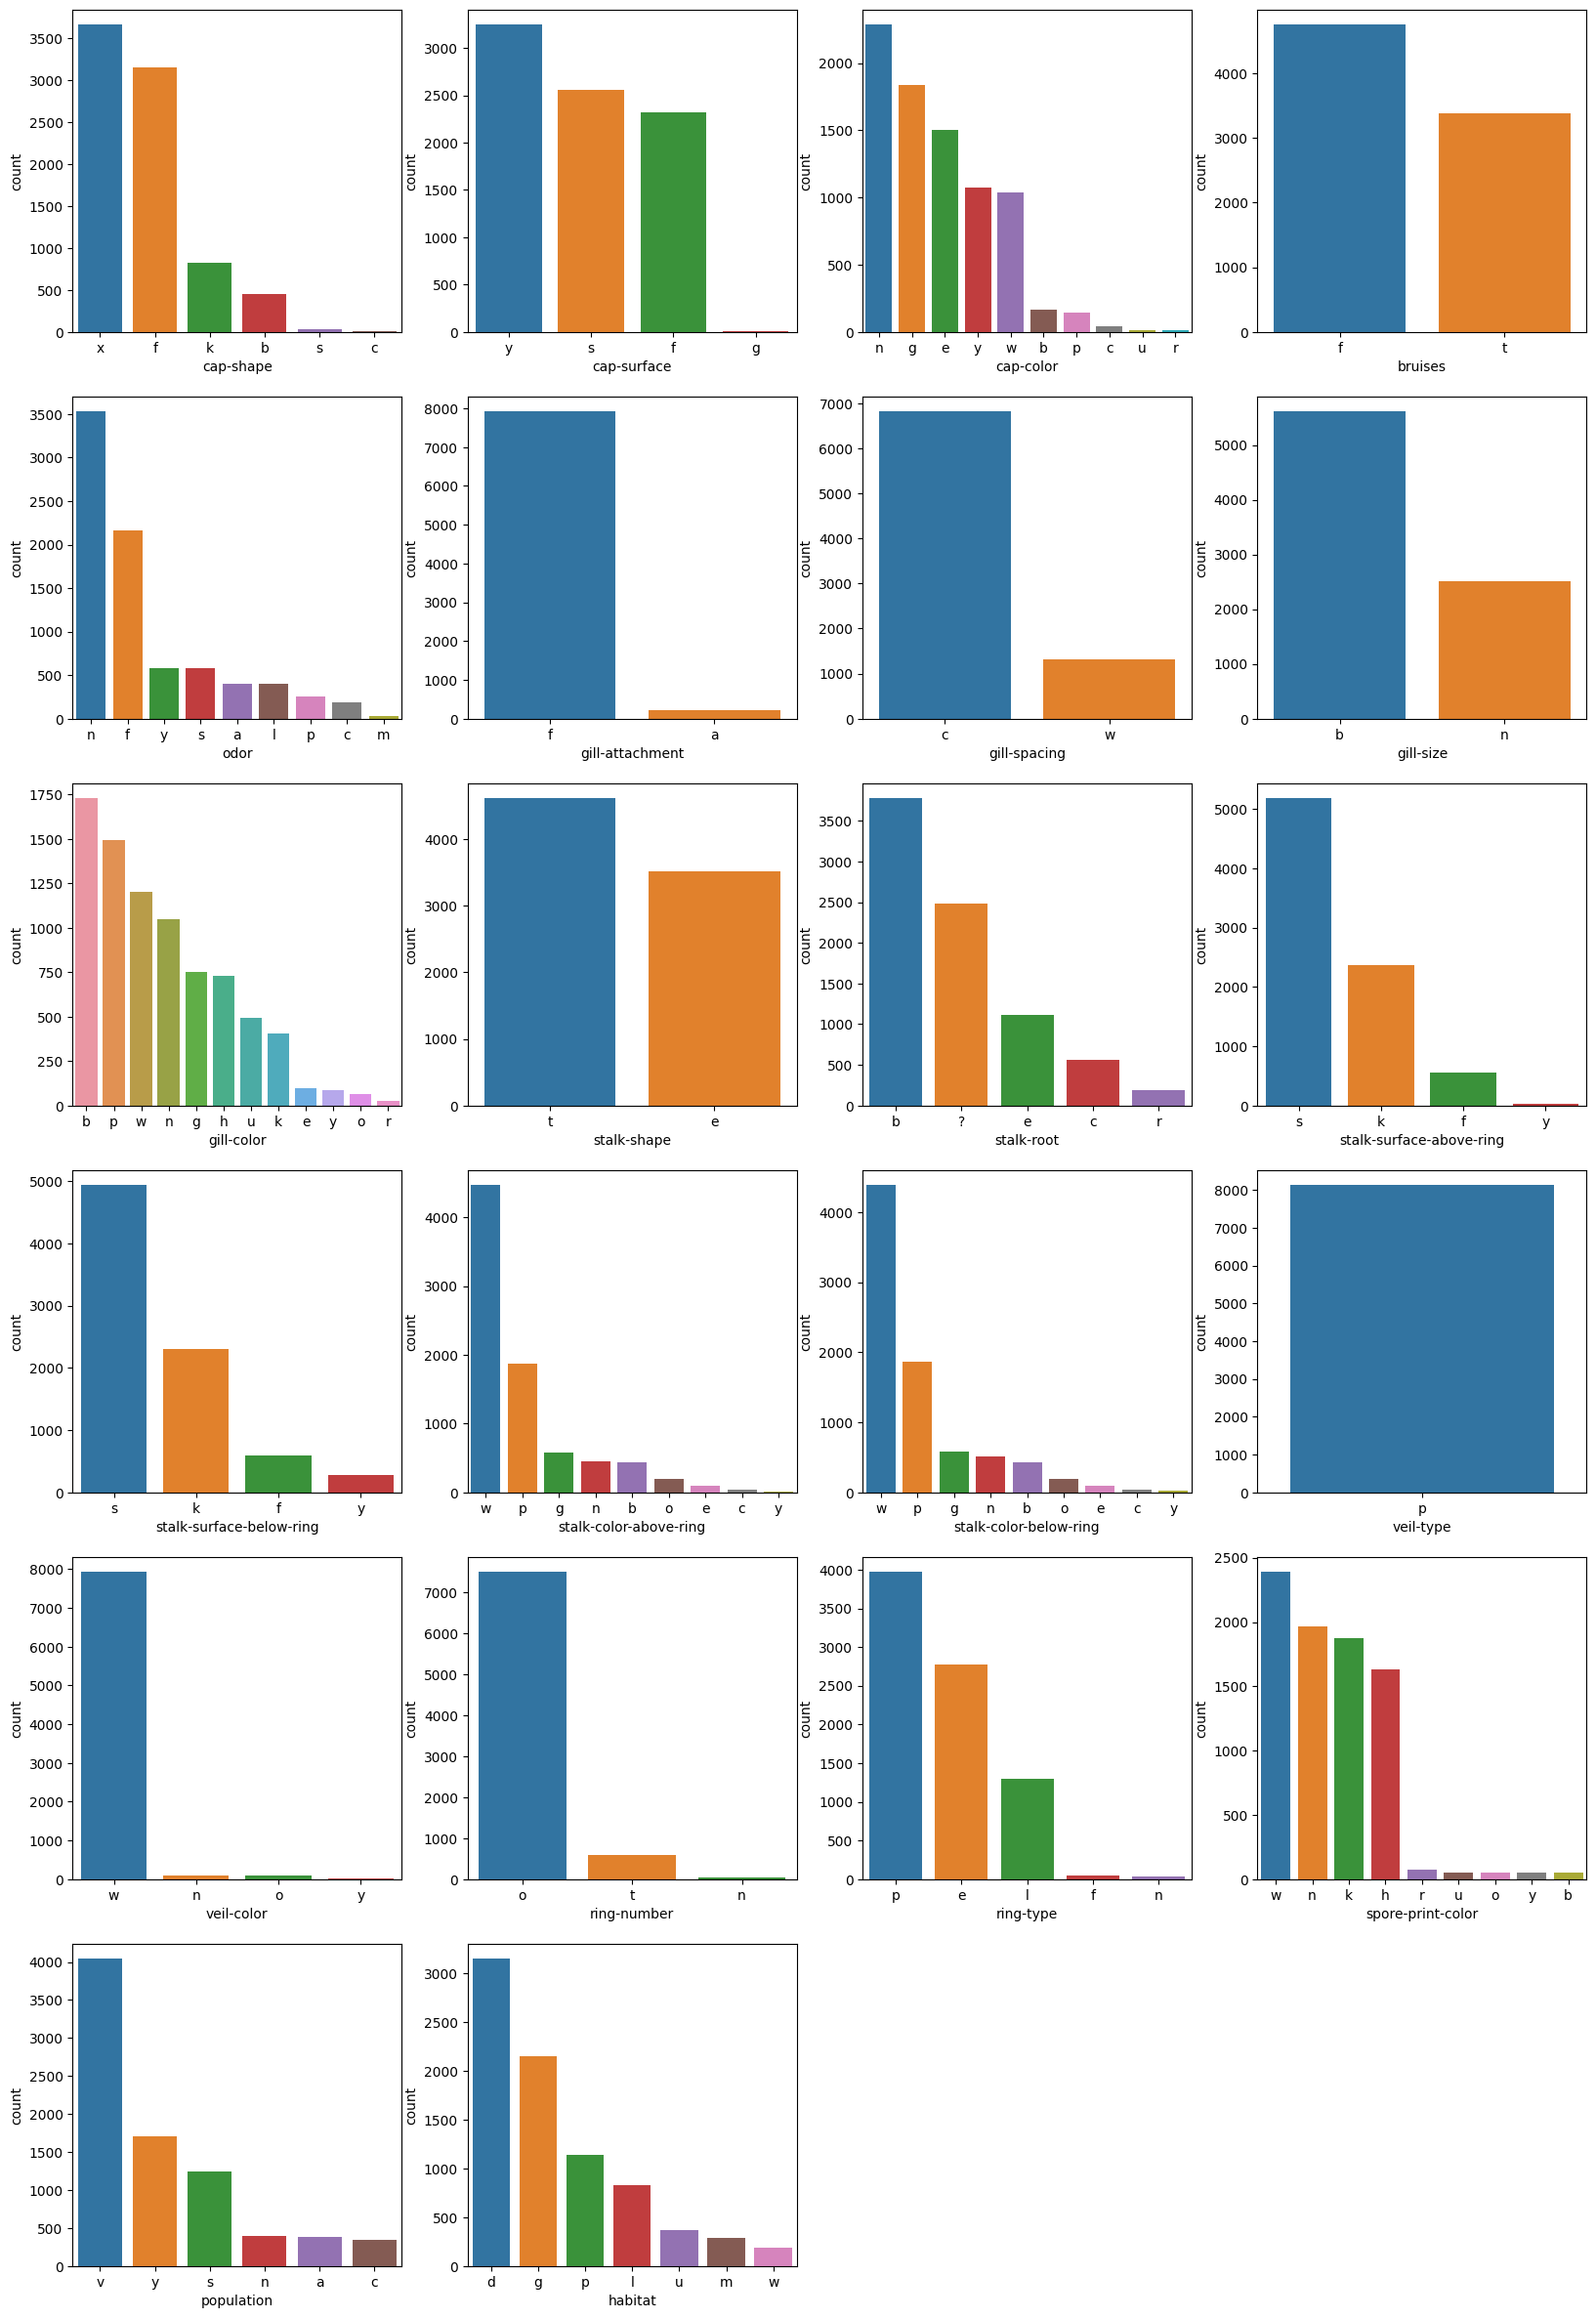

In [50]:
fig, ax = plt.subplots(6,4)
fig.set_size_inches(20, 30)
fig.delaxes(ax[5][2])
fig.delaxes(ax[5][3])
sns.countplot(x="cap-shape", ax=ax[0,0], data=data, order=data['cap-shape'].value_counts().index)
sns.countplot(x="cap-surface", ax=ax[0,1], data=data, order=data['cap-surface'].value_counts().index)
sns.countplot(x="cap-color", ax=ax[0,2], data=data, order=data['cap-color'].value_counts().index)
sns.countplot(x="bruises", ax=ax[0,3], data=data, order=data['bruises'].value_counts().index)
sns.countplot(x="odor", ax=ax[1,0], data=data, order=data['odor'].value_counts().index)
sns.countplot(x="gill-attachment", ax=ax[1,1], data=data, order=data['gill-attachment'].value_counts().index)
sns.countplot(x="gill-spacing", ax=ax[1,2], data=data, order=data['gill-spacing'].value_counts().index)
sns.countplot(x="gill-size", ax=ax[1,3], data=data, order=data['gill-size'].value_counts().index)
sns.countplot(x="gill-color", ax=ax[2,0], data=data, order=data['gill-color'].value_counts().index)
sns.countplot(x="stalk-shape", ax=ax[2,1], data=data, order=data['stalk-shape'].value_counts().index)
sns.countplot(x="stalk-root", ax=ax[2,2], data=data, order=data['stalk-root'].value_counts().index)
sns.countplot(x="stalk-surface-above-ring", ax=ax[2,3], data=data, order=data['stalk-surface-above-ring'].value_counts().index)
sns.countplot(x="stalk-surface-below-ring", ax=ax[3,0], data=data, order=data['stalk-surface-below-ring'].value_counts().index)
sns.countplot(x="stalk-color-above-ring", ax=ax[3,1], data=data, order=data['stalk-color-above-ring'].value_counts().index)
sns.countplot(x="stalk-color-below-ring", ax=ax[3,2], data=data, order=data['stalk-color-below-ring'].value_counts().index)
sns.countplot(x="veil-type", ax=ax[3,3], data=data, order=data['veil-type'].value_counts().index)
sns.countplot(x="veil-color", ax=ax[4,0], data=data, order=data['veil-color'].value_counts().index)
sns.countplot(x="ring-number", ax=ax[4,1], data=data, order=data['ring-number'].value_counts().index)
sns.countplot(x="ring-type", ax=ax[4,2], data=data, order=data['ring-type'].value_counts().index)
sns.countplot(x="spore-print-color", ax=ax[4,3], data=data, order=data['spore-print-color'].value_counts().index)
sns.countplot(x="population", ax=ax[5,0], data=data, order=data['population'].value_counts().index)
sns.countplot(x="habitat", ax=ax[5,1], data=data, order=data['habitat'].value_counts().index)

Сразу бросается в глаза, что признак `veil-type` у всех образцов одинаков и равен `p`. Это означает, что никакой смысловой нагрузки данный признак не несет и его можно удалить.

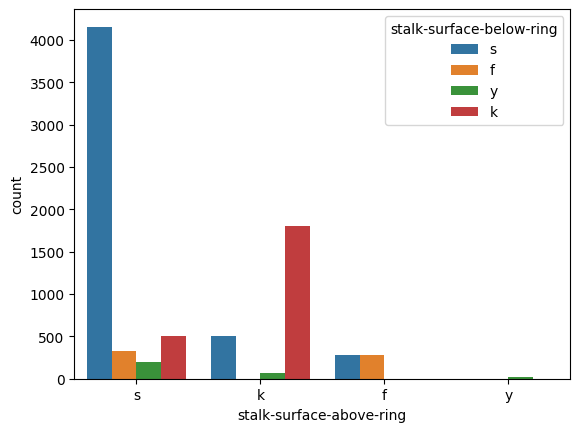

In [51]:
sns.countplot(x="stalk-surface-above-ring", data=data, order=data['stalk-surface-above-ring'].value_counts().index, hue="stalk-surface-below-ring")
pass

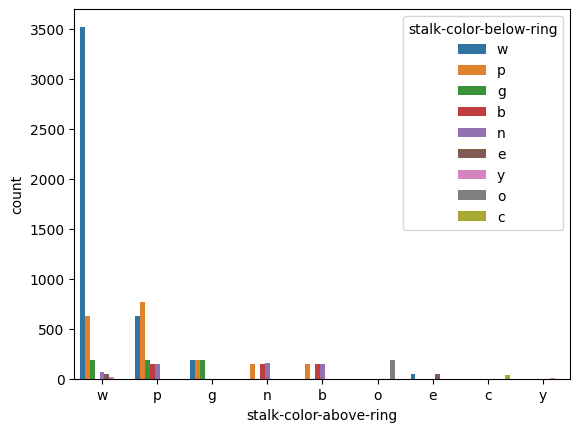

In [52]:
sns.countplot(x="stalk-color-above-ring", data=data, order=data['stalk-color-above-ring'].value_counts().index, hue="stalk-color-below-ring")
pass

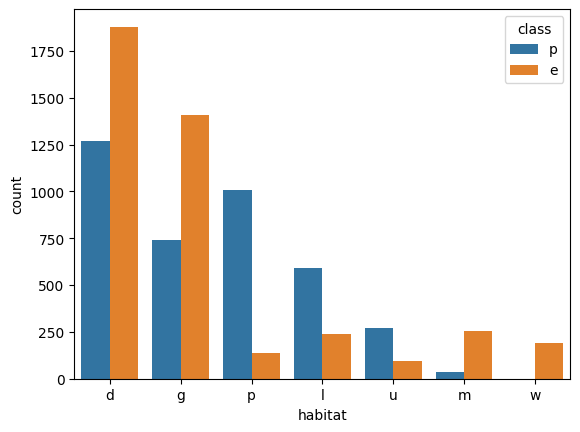

In [53]:
sns.countplot(x="habitat", data=data, order=data['habitat'].value_counts().index, hue="class")
pass

## Готовим данные

Удаляем признак `veil-type` за ненадобностью:

In [54]:
data = data.drop(labels="veil-type", axis=1)

Проверим наши данные на наличие пропущенных значений:

In [55]:
for col in data.columns:
    print(f"{data[col].isna().sum()} values are missing in the column '{col}'")

0 values are missing in the column 'class'
0 values are missing in the column 'cap-shape'
0 values are missing in the column 'cap-surface'
0 values are missing in the column 'cap-color'
0 values are missing in the column 'bruises'
0 values are missing in the column 'odor'
0 values are missing in the column 'gill-attachment'
0 values are missing in the column 'gill-spacing'
0 values are missing in the column 'gill-size'
0 values are missing in the column 'gill-color'
0 values are missing in the column 'stalk-shape'
0 values are missing in the column 'stalk-root'
0 values are missing in the column 'stalk-surface-above-ring'
0 values are missing in the column 'stalk-surface-below-ring'
0 values are missing in the column 'stalk-color-above-ring'
0 values are missing in the column 'stalk-color-below-ring'
0 values are missing in the column 'veil-color'
0 values are missing in the column 'ring-number'
0 values are missing in the column 'ring-type'
0 values are missing in the column 'spore-pr

Разделим категориальные признаки на бинарные и небинарные:

In [56]:
binary_columns    = [c for c in data if data.describe(include = [object])[c]['unique'] == 2]
nonbinary_columns = [c for c in data if data.describe(include = [object])[c]['unique'] > 2]
print(f"{binary_columns=}\n")
print(f"{nonbinary_columns=}")

binary_columns=['class', 'bruises', 'gill-attachment', 'gill-spacing', 'gill-size', 'stalk-shape']

nonbinary_columns=['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-color', 'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'ring-type', 'spore-print-color', 'population', 'habitat']


Для бинарных признаков заменим значения на 0 и 1:

In [57]:
for binary in binary_columns:
    data[binary] = data[binary].factorize()[0]

К небинарных признакам применим метод векторизации:


In [58]:
vectorized_nonbinary_data = pd.get_dummies(data[nonbinary_columns])

Соединяем все данные:

In [59]:
data = pd.concat((data[binary_columns], vectorized_nonbinary_data), axis = 1)

Проверим, все ли у нас получилось правильно:

In [60]:
data

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,1,0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
4,1,1,0,1,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,1,1,1,0,1,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
8120,1,1,1,0,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
8121,1,1,1,0,1,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
8122,0,1,0,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0


Как можно видеть, съедобные грибы получили метку 1, ядовитые - 0.

In [61]:
data.describe(include="all")

,class,bruises,gill-attachment,gill-spacing,gill-size,stalk-shape,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
count,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,...,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000,8124.000000
mean,0.517971,0.584441,0.025849,0.161497,0.690793,0.567208,0.055638,0.000492,0.387986,0.101920,...,0.153619,0.497292,0.210734,0.387494,0.264402,0.102413,0.035943,0.140817,0.045298,0.023634
std,0.499708,0.492848,0.158695,0.368011,0.462195,0.495493,0.229235,0.022185,0.487321,0.302562,...,0.360605,0.500023,0.407855,0.487208,0.441041,0.303209,0.186159,0.347854,0.207969,0.151914
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Теперь визуализируем уже обработанные данные с помощью матрицы корреляции:

<AxesSubplot:>

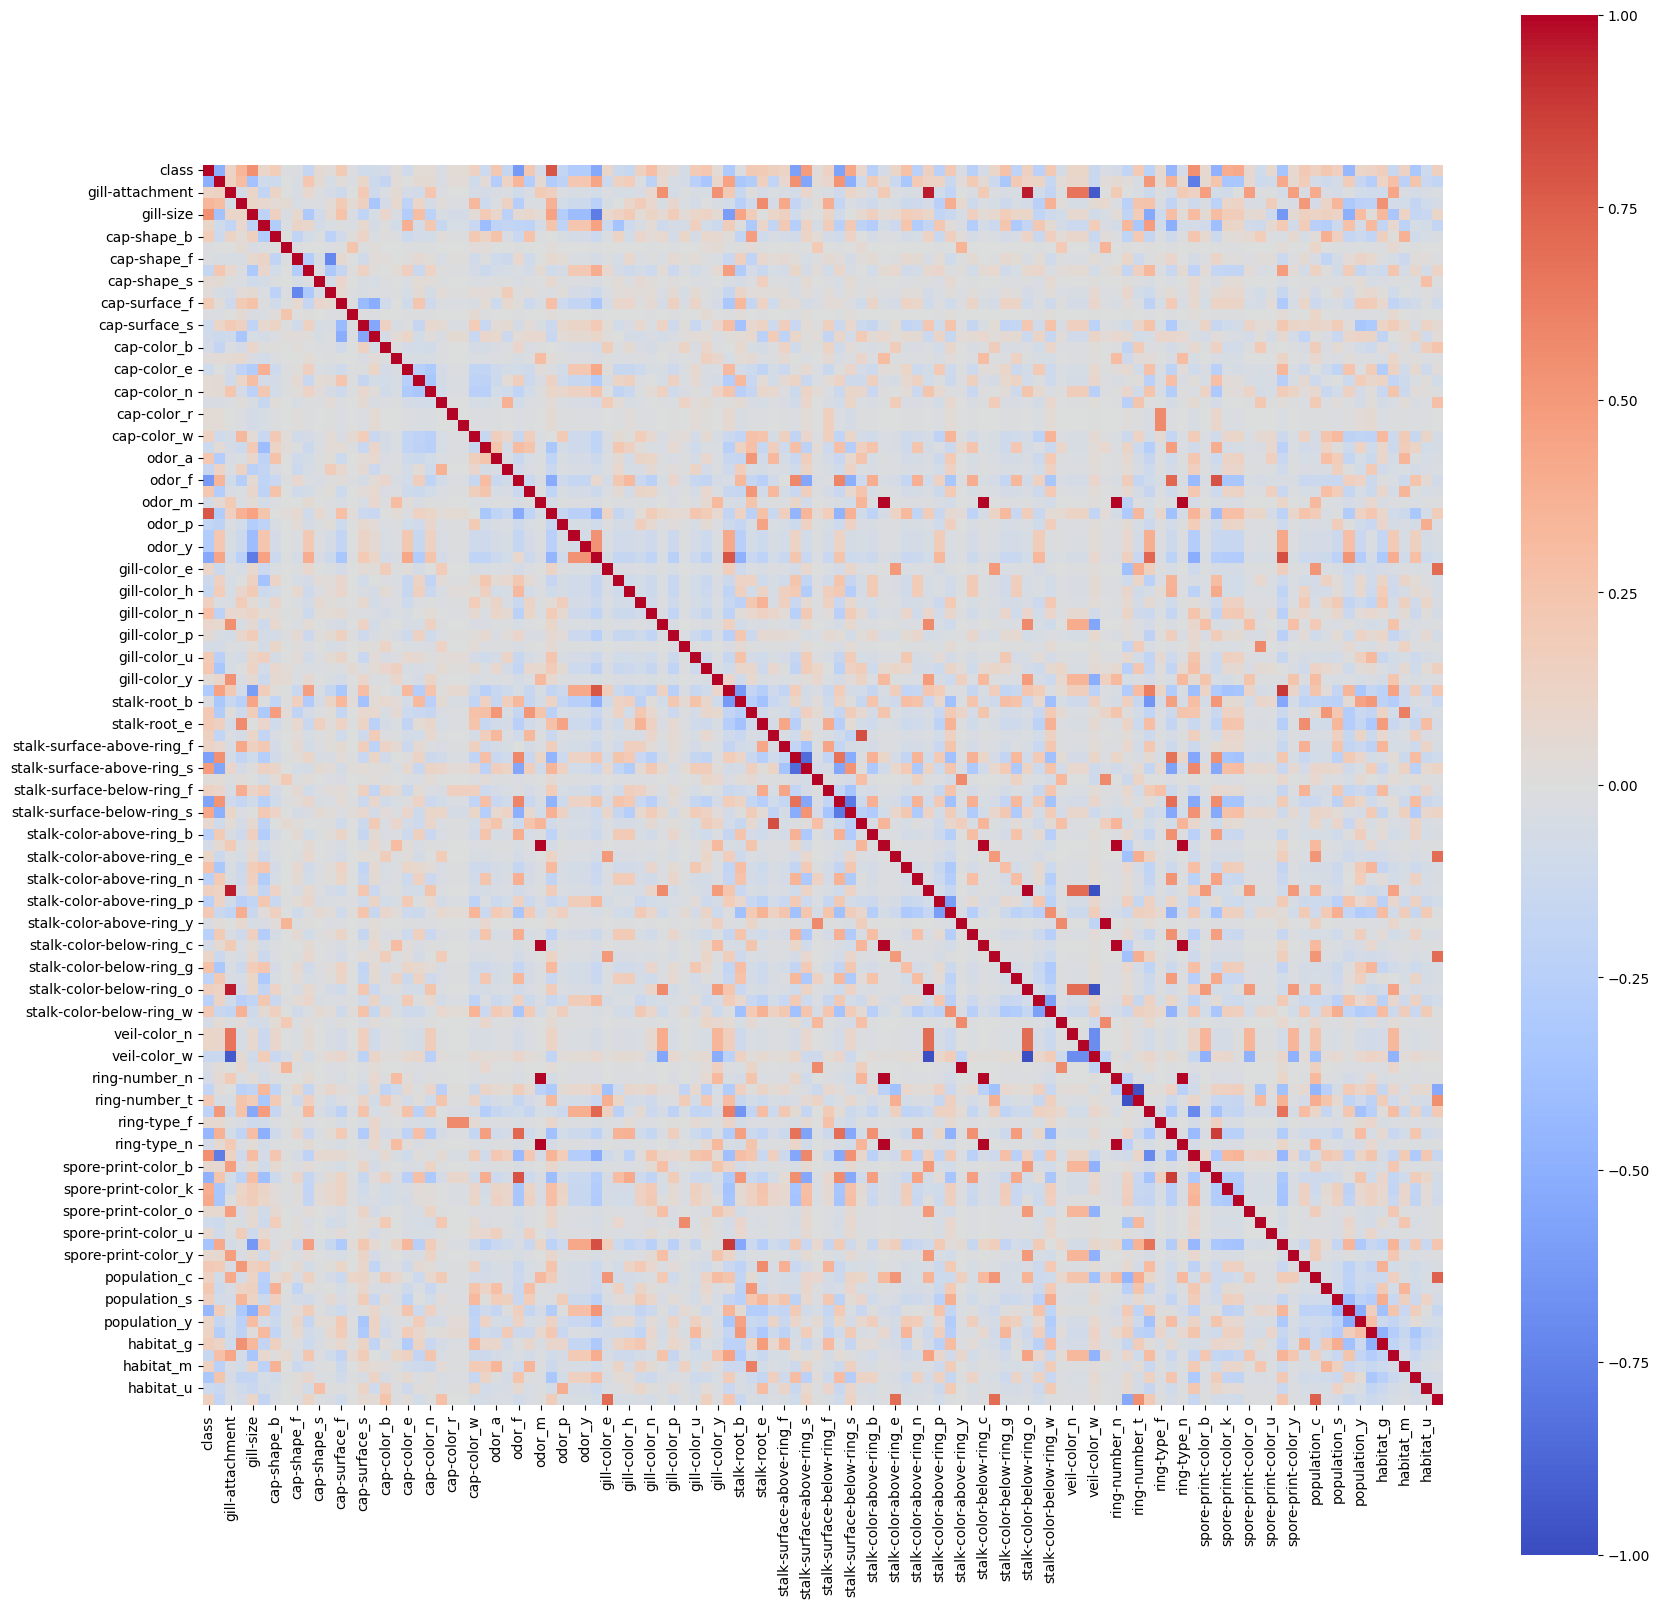

In [62]:
corr_mat = data.corr(numeric_only=True)
plt.figure(figsize = (20,20))
sns.heatmap(corr_mat, square=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')

С учетом того, что все наши признаки - результат векторизации категориальных признаков, то визуализация с помощью гистограмм и матриц рассеивания нам, вряд ли, что-то даст. Поэтому пропустим этот пункт и пойдем дальше.

Разделим наши данные на `y` и `x`:

In [63]:
X = data.drop('class', axis = 1)
y = data['class']

Переформатируем наши данные в формат numpy:

In [64]:
X=X.to_numpy()
y=y.to_numpy()

Разделим датасет на обучающую и тестовую выборки:

In [ ]:
import sys
!{sys.executable} -m pip install scikit-learn

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 7)

## Обучение

### kNN:

Для начала попробуем обучить нашу модель с помощью метода `kNN`:

In [67]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, y_train)

y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train  = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.0
err_test=0.0


In [68]:
print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[2730    0]
 [   0 2956]]

[[1186    0]
 [   0 1252]]



Результат можно смело назвать хорошим, метод kNN смог идельно разделить наши классы как на обучающей, так и на тестовой выборке.

### SVC:

Далее попробуем решить нашу задачу классификации при помощи методы `"машины опорных векторов"`:

In [69]:
from sklearn.svm import SVC
svc = SVC(gamma=0.0001)
svc.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

print(f"{err_train=}")
print(f"{err_test=}")

err_train=0.101301442138586
err_test=0.09639048400328137


In [70]:
print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

[[2154  576]
 [   0 2956]]

[[ 951  235]
 [   0 1252]]



В случае с ядовитыми грибами, логичнее в качестве меры качества использовать Precision (определение ядовитых грибов в качетве съедобных чревато печальными последствиями):

In [71]:
from sklearn.metrics import precision_score

precision_train = precision_score(y_train, y_train_predict)
precision_test = precision_score(y_test, y_test_predict)

print(f"{precision_train=}")
print(f"{precision_test=}")

precision_train=0.8369195922989807
precision_test=0.8419636852723604


Результаты обучения получились достаточно неплохими, однако есть смысл попытаться их улучшить:

Рассмотрим зависимость `error` и `precision` от параметра `gamma`, и подберем оптимальный 

In [72]:
gamma_arr = np.logspace(-4, 0, 30, base=10)
test_err = []
train_err = []
train_pr = []
test_pr = []

for g in gamma_arr:
    mlp_model = SVC(gamma=g)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))
    train_pr.append(precision_score(y_train, y_train_pred))
    test_pr.append(precision_score(y_test, y_test_pred))


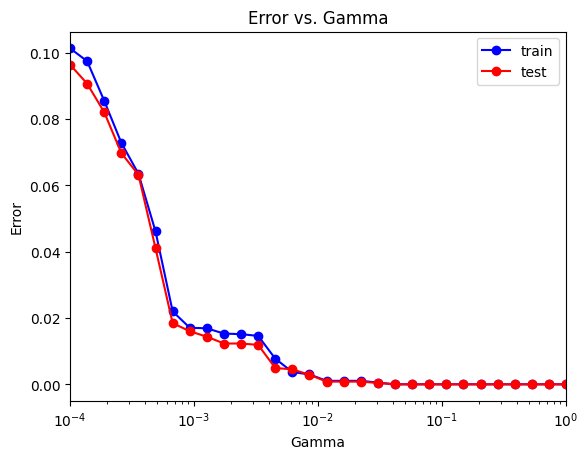

In [73]:
plt.semilogx(gamma_arr, train_err, 'b-o', label = 'train')
plt.semilogx(gamma_arr, test_err, 'r-o', label = 'test')
plt.xlim([np.min(gamma_arr), np.max(gamma_arr)])
plt.title('Error vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('Error')
plt.legend()

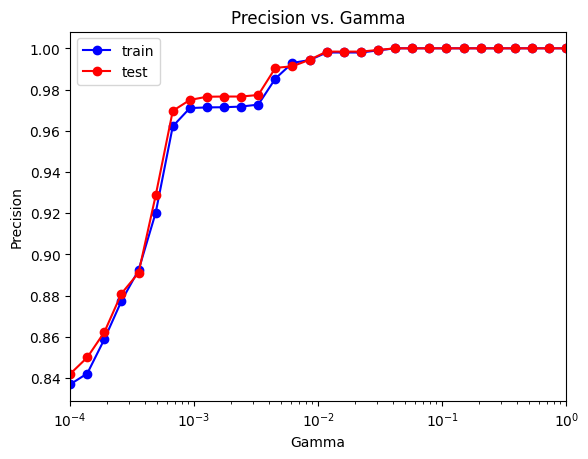

In [74]:
plt.semilogx(gamma_arr, train_pr, 'b-o', label = 'train')
plt.semilogx(gamma_arr, test_pr, 'r-o', label = 'test')
plt.xlim([np.min(gamma_arr), np.max(gamma_arr)])
plt.title('Precision vs. Gamma')
plt.xlabel('Gamma')
plt.ylabel('Precision')
plt.legend()

Как видно, подбор параметра `gamma`, позволяет значительно улучшить результаты предсказаний. Обучим модель заново, используя оптимальное значение `gamma`:

In [75]:
gamma_opt = gamma_arr[test_pr.index(max(test_pr))]
print(gamma_opt)

0.041753189365604


In [76]:
svc = SVC(gamma=gamma_opt)
svc.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)

precision_train = precision_score(y_train, y_train_predict)
precision_test = precision_score(y_test, y_test_predict)

print(f"{err_train=}")
print(f"{err_test=}\n")

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

print(f"{precision_train=}")
print(f"{precision_test=}")

err_train=0.0
err_test=0.0

[[2730    0]
 [   0 2956]]

[[1186    0]
 [   0 1252]]

precision_train=1.0
precision_test=1.0


Получили результат, схожий с методом `kNN`.

### Random Forest:

In [77]:
from sklearn import ensemble
rf = ensemble.RandomForestClassifier(n_estimators = 1000)
rf.fit(X_train, y_train)

y_train_predict = svc.predict(X_train)
y_test_predict = svc.predict(X_test)

err_train = np.mean(y_train != rf.predict(X_train))
err_test  = np.mean(y_test  != rf.predict(X_test))

print(f"{err_train=}")
print(f"{err_test=}\n")

print(confusion_matrix(y_train, y_train_predict), end="\n\n")
print(confusion_matrix(y_test, y_test_predict), end="\n\n")

err_train=0.0
err_test=0.0

[[2730    0]
 [   0 2956]]

[[1186    0]
 [   0 1252]]



Как и ожидалось, `Random Forest` также отлично справился с решением задачи.

### Логистическая регрессия:

In [78]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(solver="liblinear")
clf.fit(X_train, y_train)

y_test_predict = clf.predict(X_test)
y_train_predict = clf.predict(X_train)
err_test  = np.mean(y_test  != y_test_predict)
err_train  = np.mean(y_train != y_train_predict)

print(f"{err_train=}")
print(f"{err_test=}", end="\n\n")

print(f"{confusion_matrix(y_train, y_train_predict)}", end="\n\n")
print(f"{confusion_matrix(y_test, y_test_predict)}", end="\n\n")

err_train=0.0
err_test=0.0

[[2730    0]
 [   0 2956]]

[[1186    0]
 [   0 1252]]



Метод `"логистической регрессии"` показал схожий результат. Все это свидетельствует о том, что наши 2 класса оказались хорошо отделимы друг от друга.
Дальнейшее улучшение качества классификации, по понятным причинам, невозможно. Остается только минимизировать вычислительные затраты, впрочем у `"логистической регрессии"` они и так достаточно малы.